In [1]:
# Data & Visualization Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
from matplotlib import pyplot as plt

# Machine Learning / Deep Learning Libraries
from sklearn.model_selection import train_test_split


# Using TensorFlow 2.x for better compatibility
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

2025-10-19 08:17:38.616957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760861858.816570      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760861858.874158      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Correct directory paths
traindir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
validdir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
testdir = "/kaggle/input/new-plant-diseases-dataset/test/test"

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range= 45,
    fill_mode='nearest'
)

# Only rescaling for validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

# Only rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
training_set = train_datagen.flow_from_directory(
    traindir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

# Validation data generator
valid_set = valid_datagen.flow_from_directory(
    validdir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)

# Optional: Test data generator (if test folder does NOT contain subfolders)
test_set = test_datagen.flow_from_directory(
    "/kaggle/input/new-plant-diseases-dataset/test",
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Found 33 images belonging to 1 classes.


In [3]:
class_dict = training_set.class_indices

for class_name, class_index in class_dict.items():
    print(f"{class_name}: {class_index}")



Apple___Apple_scab: 0
Apple___Black_rot: 1
Apple___Cedar_apple_rust: 2
Apple___healthy: 3
Blueberry___healthy: 4
Cherry_(including_sour)___Powdery_mildew: 5
Cherry_(including_sour)___healthy: 6
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 7
Corn_(maize)___Common_rust_: 8
Corn_(maize)___Northern_Leaf_Blight: 9
Corn_(maize)___healthy: 10
Grape___Black_rot: 11
Grape___Esca_(Black_Measles): 12
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 13
Grape___healthy: 14
Orange___Haunglongbing_(Citrus_greening): 15
Peach___Bacterial_spot: 16
Peach___healthy: 17
Pepper,_bell___Bacterial_spot: 18
Pepper,_bell___healthy: 19
Potato___Early_blight: 20
Potato___Late_blight: 21
Potato___healthy: 22
Raspberry___healthy: 23
Soybean___healthy: 24
Squash___Powdery_mildew: 25
Strawberry___Leaf_scorch: 26
Strawberry___healthy: 27
Tomato___Bacterial_spot: 28
Tomato___Early_blight: 29
Tomato___Late_blight: 30
Tomato___Leaf_Mold: 31
Tomato___Septoria_leaf_spot: 32
Tomato___Spider_mites Two-spotted_spider_mite:

In [4]:
li = list(class_dict.keys())

for class_name in li:
    print(class_name)

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___Powdery_mildew
Cherry_(including_sour)___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___healthy
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Grape___healthy
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___Late_blight
Potato___healthy
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___Leaf_scorch
Strawberry___healthy
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_mosaic_virus
Tomato___healthy


In [5]:
train_num = training_set.samples
valid_num = valid_set.samples

In [6]:
base_model=VGG19(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

I0000 00:00:1760861889.267253      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the VGG19 model without the top classification layer
base_model = VGG19(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224, 224, 3)
)

# Freeze the base model layers (optional: you can fine-tune later)
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(38, activation='softmax'))  # 38 classes

# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │       953,382 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,977,766 (80.02 MB)

 Trainable params: 953,382 (3.64 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
steps_per_epoch = len(training_set)
validation_steps = len(valid_set)

history = model.fit(
    training_set,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_set,
    validation_steps=validation_steps,
    epochs=10,
    callbacks=None
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1760861899.391324     116 service.cc:148] XLA service 0x7a90f080ec90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760861899.392285     116 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1760861899.766327     116 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1760861926.210945     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


550/550 ━━━━━━━━━━━━━━━━━━━━ 1260s 2s/step - accuracy: 0.5997 - loss: 1.5090 - val_accuracy: 0.8590 - val_loss: 0.4521
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 934s 2s/step - accuracy: 0.8230 - loss: 0.5628 - val_accuracy: 0.8823 - val_loss: 0.3705
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.8425 - loss: 0.4975 - val_accuracy: 0.8808 - val_loss: 0.3816
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 932s 2s/step - accuracy: 0.8563 - loss: 0.4602 - val_accuracy: 0.9092 - val_loss: 0.2876
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 932s 2s/step - accuracy: 0.8661 - loss: 0.4287 - val_accuracy: 0.8895 - val_loss: 0.3785
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 904s 2s/step - accuracy: 0.8666 - loss: 0.4328 - val_accuracy: 0.8995 - val_loss: 0.3498
Epoch 7/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 928s 2s/step - accuracy: 0.8734 - loss: 0.4184 - val_accuracy: 0.9050 - val_loss: 0.3290
Epoch 8/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 906s 2s/step - accuracy: 0.8791 - loss: 0.4013 - val_accuracy: 0.89

In [10]:
model.save('/kaggle/working/plant_disease_model_vgg19.h5')

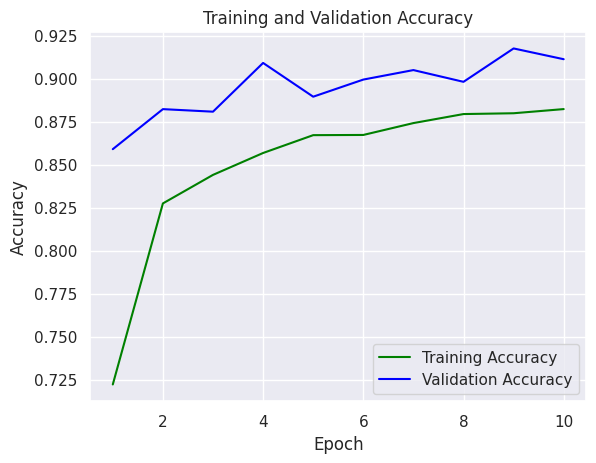

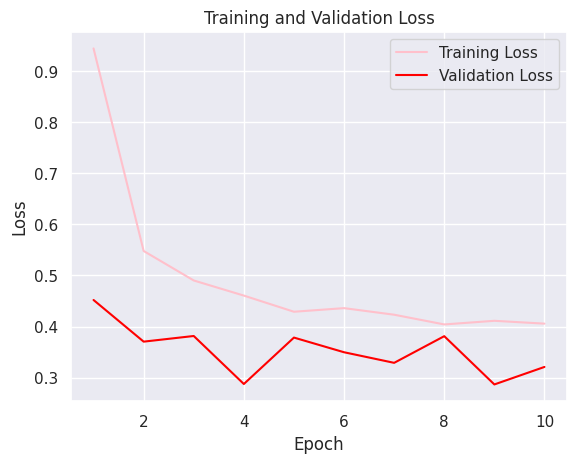

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


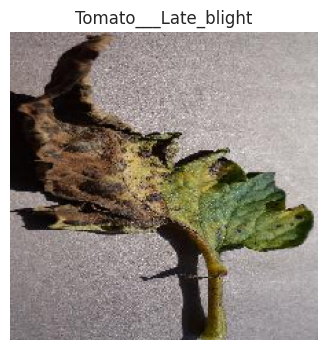

In [12]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "../input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()